In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import urllib, json
import matplotlib.dates as mdates
from pandas.plotting import register_matplotlib_converters
from matplotlib import rcParams, ticker, dates
register_matplotlib_converters()
# #load data
# k_df = pd.read_csv('data/kinneret_level.csv')
# ds_df = pd.read_csv('data/dead_sea_level.csv')

# #rename columns
# ds_df = ds_df.rename(columns={'תאריך מדידה':'date','מפלס':'ds_level'})
# k_df = k_df.rename(columns={'תאריך מדידה':'date','מפלס הכנרת במטרים':'k_level'})



In [2]:
url = 'https://data.gov.il/api/action/datastore_search?resource_id=823479b4-4771-43d8-9189-6a2a1dcaaf10&limit=10000'
fileobj = urllib.request.urlopen(url) 

In [3]:
# #LOAD DEAD SEA DATA
# url = 'https://data.gov.il/api/action/datastore_search?resource_id=823479b4-4771-43d8-9189-6a2a1dcaaf10&limit=10000'
# fileobj = urllib.request.urlopen(url) 
# data = json.loads(fileobj.read())
# ds_df = pd.DataFrame(data['result']['records'])
# ds_df = ds_df.rename(columns={'תאריך מדידה':'date','מפלס':'ds_level'}).drop(columns='_id')
# ds_df['ds_level'] = ds_df['ds_level'].astype('float')


In [4]:
#LOAD DEAD SEA DATA
url = 'https://data.gov.il/api/action/datastore_search?resource_id=823479b4-4771-43d8-9189-6a2a1dcaaf10&limit=10000'
fileobj = urllib.request.urlopen(url) 
data = json.loads(fileobj.read())
ds_df = pd.DataFrame(data['result']['records'])
ds_df = ds_df.rename(columns={'תאריך מדידה':'date','מפלס':'ds_level'}).drop(columns='_id')
ds_df['ds_level'] = ds_df['ds_level'].astype('float')
#sort by date
ds_df['date'] = pd.to_datetime(ds_df['date'])

# ds_df['date'] = pd.to_datetime(ds_df['date'], format='%d/%m/%Y')
ds_df = ds_df.sort_values(by='date').reset_index(drop=True)
ds_df['year'] = ds_df['date'].dt.year

In [5]:
#LOAD SEA GALILEE DATA
url = 'https://data.gov.il/api/action/datastore_search?resource_id=2de7b543-e13d-4e7e-b4c8-56071bc4d3c8&limit=15000'
fileobj = urllib.request.urlopen(url) 
data = json.loads(fileobj.read())
k_df = pd.DataFrame(data['result']['records'])
k_df = k_df.rename(columns={'Survey_Date':'date','Kinneret_Level':'k_level'}).drop(columns='_id')
k_df.head()
# #sort by date
k_df['date'] = pd.to_datetime(k_df['date'])
k_df = k_df.sort_values(by='date').reset_index(drop=True)
k_df['year'] = k_df['date'].dt.year

k_df.tail()

,date,k_level,year
9300,2020-11-27,-209.940,2020
9301,2020-11-28,-209.945,2020
9302,2020-11-29,-209.945,2020
9303,2020-11-30,-209.955,2020
9304,2020-12-01,-209.950,2020


In [6]:
# #datetime
# k_df['date'] = pd.to_datetime(k_df['date'],format='%d %b %Y')
# ds_df['date'] = pd.to_datetime(ds_df['date'],format='%d/%m/%Y')
# k_df['year'] = k_df['date'].dt.year
# ds_df['year'] = ds_df['date'].dt.year


In [7]:
#clean mistake
k_df.loc[k_df['date']=='2009-09-19','k_level'] = np.nan

In [8]:
#merge df
k_ds_df = k_df.merge(ds_df, on=['date','year'], how='outer').sort_values(by='date')
#filter data from first available dead sea data
k_ds_df_1976 = k_ds_df.loc[k_ds_df.date >= '1976-10-01'].reset_index(drop=True)
k_ds_df_1976.tail()

,date,k_level,year,ds_level
8955,2020-11-27,-209.940,2020,NaN
8956,2020-11-28,-209.945,2020,NaN
8957,2020-11-29,-209.945,2020,-435.18
8958,2020-11-30,-209.955,2020,NaN
8959,2020-12-01,-209.950,2020,NaN


In [9]:
k_ds_df_1976['k_level'] = k_ds_df_1976['k_level'].astype('float')
#start level
k_start_level = k_ds_df_1976['k_level'].iloc[0]
ds_start_level = k_ds_df_1976['ds_level'].iloc[0]
print("Kinneret start level (1976): {}".format(k_start_level))
print("Dead Sea start level (1976): {}".format(ds_start_level))

Kinneret start level (1976): -210.99
Dead Sea start level (1976): -398.95


In [10]:
k_ds_df_1976['date_month_day'] = [str(x) +'/'+str(y) for x,y in zip(k_ds_df_1976['date'].dt.day, k_ds_df_1976['date'].dt.month)]
df = k_ds_df_1976.loc[k_ds_df_1976.date_month_day.isin(['29/8','30/8','31/8','1/9','2/9','3/9']),['year','k_level','date_month_day']]
df.year.unique()
df2 = df.groupby('year').mean().reset_index().dropna()


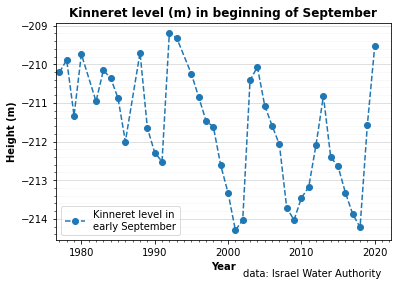

In [11]:

ax = df2.plot('year','k_level', marker='o', linestyle='--', label='Kinneret level in\nearly September', legend=False)

ax.set_xlabel('Year', weight='bold')
ax.set_ylabel('Height (m)', weight='bold')
ax.yaxis.set_minor_locator(ticker.MultipleLocator(.2))
ax.xaxis.set_minor_locator(ticker.MultipleLocator())
ax.legend(loc='lower left', framealpha=0.7)
ax.grid(True, 'major', 'y', alpha=0.5)
ax.grid(True, 'minor', 'y', alpha=0.1)
ax.set_title('Kinneret level (m) in beginning of September', weight='bold')
ax.set_xlim(1976.5,None)
ax.text(2002, -215.5 ,'data: Israel Water Authority')
plt.savefig('BeginSeptember.jpg', dpi=300)

In [12]:
#dif
k_ds_df_1976['k_dif'] = k_ds_df_1976['k_level'] - k_start_level
k_ds_df_1976['ds_dif'] = k_ds_df_1976['ds_level'] - ds_start_level
k_ds_df_1976.to_csv('data/merged_ds_k.csv')
#create clean tables for graph
ds_final=k_ds_df_1976[['date','ds_dif']].dropna().reset_index(drop=True)
k_final=k_ds_df_1976[['date','k_dif']].dropna().reset_index(drop=True)

In [13]:
ds_final.tail()
k_final.tail()

,date,k_dif
8784,2020-11-27,1.050
8785,2020-11-28,1.045
8786,2020-11-29,1.045
8787,2020-11-30,1.035
8788,2020-12-01,1.040


In [14]:
rcParams['axes.spines.right'] = False
rcParams['axes.spines.top'] = False
rcParams['font.family'] = ['Lato']
rcParams['font.size'] = 14
rcParams['font.weight'] = 'semibold'

In [16]:
ds_final.loc[ds_final.date.dt.year==1992]

,date,ds_dif
177,1992-01-27,-9.04
178,1992-02-24,-8.15
179,1992-03-29,-7.52
180,1992-04-27,-7.51
181,1992-05-26,-7.42
182,1992-06-21,-7.69
183,1992-07-26,-7.80
184,1992-08-27,-8.09
185,1992-09-20,-8.22
186,1992-10-26,-8.33


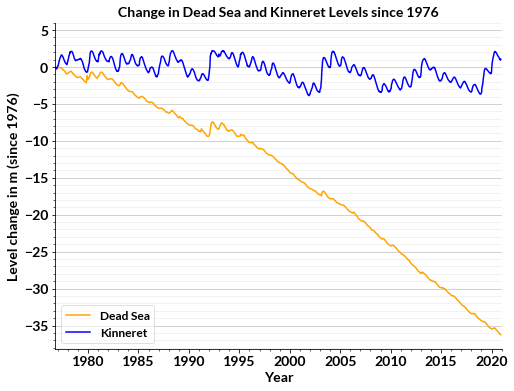

In [17]:
#graph
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(ds_final['date'], ds_final['ds_dif'],label='Dead Sea', color='orange')
ax.plot(k_final['date'], k_final['k_dif'],label='Kinneret',color='blue' )
ax.legend(loc='best', fontsize=12, frameon=True, framealpha=0.6)
ax.set_xlabel('Year', weight='bold')
ax.set_ylabel('Level change in m (since 1976)', weight='bold')
ax.set_xlim(pd.to_datetime(k_ds_df_1976.year.min(), format='%Y'), pd.to_datetime(k_ds_df_1976.year.max()+1, format='%Y'))
#ax.axhline(0, color='grey', alpha=0.8, lw =1.1, ls='--')
ax.set_title("Change in Dead Sea and Kinneret Levels since 1976", weight='bold', size=14)
#ax.axhline(k_final['k_dif'].iloc[-1], color='blue', alpha=0.8, lw =1.1, ls='-.')
ax.yaxis.set_minor_locator(ticker.MultipleLocator(1))
ax.xaxis.set_minor_locator(dates.YearLocator())

ax.grid(True, 'major', 'y', alpha=0.7)
ax.grid(True, 'minor', 'y', alpha=0.2)

ax.set_ylim(None,6)
ax.set_xlim(k_final['date'].min(),None)
# plt.show()
fig.savefig('KinneretVsDeadSea.png', dpi=300)


Text(0.5, 1.0, '(םימה תושר ינותנ) חלמה םי סלפמ')

C:\Users\eliav.ARO\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 1501 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\eliav.ARO\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 1497 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\eliav.ARO\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 1502 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\eliav.ARO\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 1492 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\eliav.ARO\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 1514 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\eliav.ARO\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 1

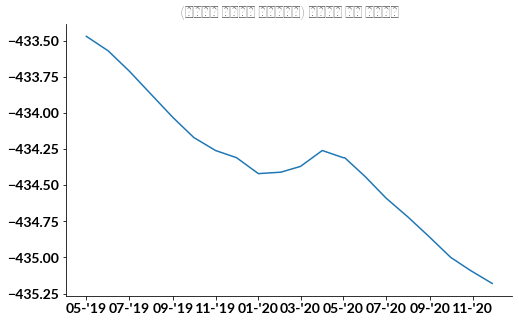

In [18]:
## DEAD SEA LEVEL FROM DATE
date =  '2019-05-01'
myFmt = mdates.DateFormatter("%m-'%y")


last_year = ds_df.loc[ds_df.date>=date]
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(last_year.date, last_year.ds_level)
ax.xaxis.set_major_formatter(myFmt)
ax.set_title('מפלס ים המלח )נתוני רשות המים('[::-1])


Text(0.5, 1.0, '(םימה תושר ינותנ) תרנכה סלפמ')

C:\Users\eliav.ARO\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 1501 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\eliav.ARO\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 1497 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\eliav.ARO\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 1502 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\eliav.ARO\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 1492 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\eliav.ARO\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 1514 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\eliav.ARO\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 1

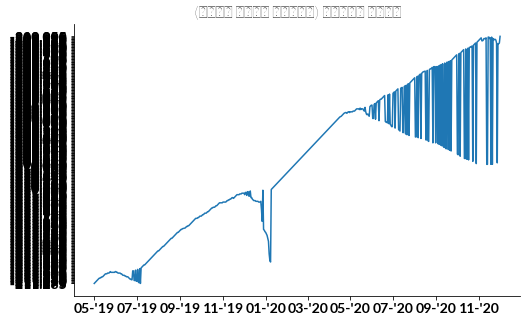

In [19]:


last_year = k_df.loc[k_df.date>=date]
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(last_year.date, last_year.k_level)
ax.xaxis.set_major_formatter(myFmt)
ax.set_title('מפלס הכנרת )נתוני רשות המים('[::-1])
